# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. 

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

In [1]:
# pretty print all cell's output and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("darkgrid")
sns.set_context("talk")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)

http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for \hat{\beta}_0)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$\hat\beta =  (X^T X)^{-1}X^T Y$

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


There are no column names in the DataFrame. Let's add those. 

In [9]:
# add names to columns
bos.columns = boston.feature_names

Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
# look at the number shape of the data
print(boston.target.shape)
bos['PRICE'] = boston.target
bos.head(3)

(506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
# summary statistics
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Distribution of housing prices
<p>The boxplot shows that housing prices in the recorded areas are widespread, covering a variety of prices and budgets, with the lowest price at around $\$ 9,000$ and the highest around $\$ 50,000$. Although there are several homes over $\$ 40,000$, the median housing prices is around $\$ 20,000$ and 50% of the homes are between $\$ 17,000$ and $\$ 25,000$</p>

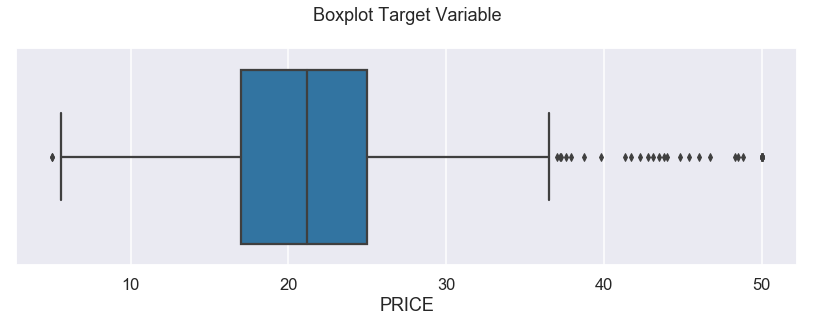

In [12]:
_=sns.set_style('darkgrid')
plt.rcParams['figure.figsize']= [14,4]
_=sns.boxplot(bos.PRICE)
_=plt.title('Boxplot Target Variable\n')

### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

#### Crime Rate and Housing Prices
<p>Looking at the relationship between crime rate and price, the plot shows there is a negative correlation between home prices and crime rates. The scatter plot shows that as crime rates increase, home prices tend to be lower.</p>

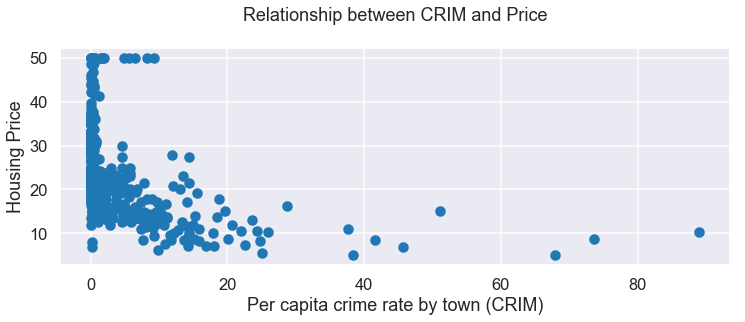

In [13]:
_=sns.set_style('darkgrid')
_=plt.rcParams['figure.figsize']=[12,4]
_=plt.scatter(bos.CRIM, bos.PRICE)
_=plt.xlabel("Per capita crime rate by town (CRIM)")
_=plt.ylabel("Housing Price")
_=plt.title("Relationship between CRIM and Price\n")

#### Average Number of Rooms and Housing Prices
<p>Although there are many internal and external attributes that contribute to housing prices, based on the reported data, in general, the number of rooms seems to have a positive effect on housing prices and there seems to be a positive linear relation. As the average number of rooms increases, so does a home’s value.</p>
<p>Aside from a few exceptions, most homes with seven or more rooms are priced above \$ 20,000. As stated above, since there are other attributes that could help explain housing prices, the home values for the outliers shown in the scatterplot below, may be impacted by other characteristics that have a greater influence on pricing.</p>

#### Pupil-Teacher Ratio by Town and Housing Prices
<p>The boxplot on the right shows that very low pupil-teacher ratios, below 14, seem to be related to higher housing prices, and rations above 20 seem to be related to lower housing prices. </p>

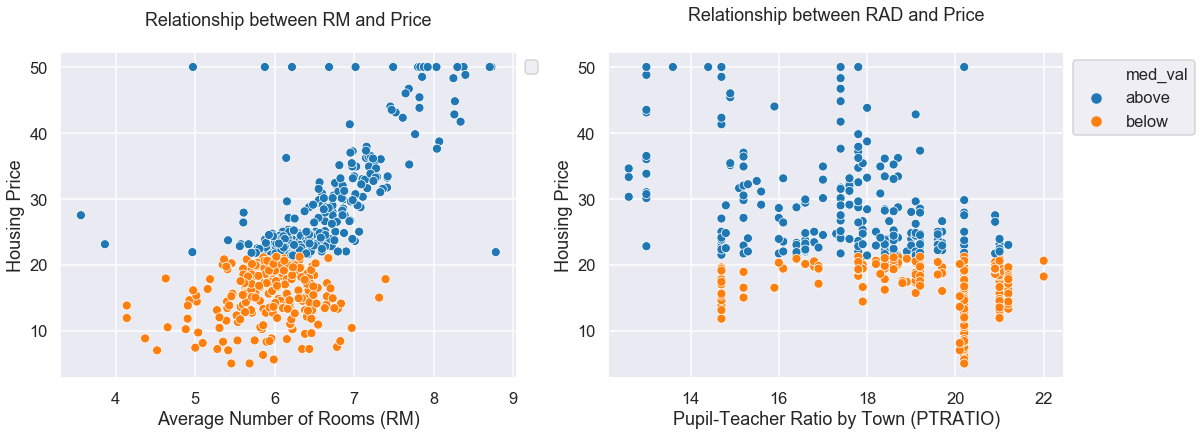

In [14]:
_=sns.set_style('darkgrid')
_=plt.rcParams['figure.figsize']=[18,6]

bos['med_val'] = ['above' if x >21.20 else 'below' for x in bos.PRICE]
_=plt.suptitle=(0.7)
_=plt.subplot(1,2,1)
_=sns.scatterplot(x='RM',y='PRICE', hue = bos['med_val'], data = bos)
_=plt.xlabel("Average Number of Rooms (RM)")
_=plt.ylabel("Housing Price")
_=plt.title("Relationship between RM and Price\n")
_=plt.legend('',bbox_to_anchor=(1, 1), loc=2)

_=plt.subplot(1,2,2)
_=sns.scatterplot(x='PTRATIO',y='PRICE', hue = 'med_val',data = bos)
_=plt.xlabel("Pupil-Teacher Ratio by Town (PTRATIO)")
_=plt.ylabel("Housing Price")
_=plt.title("Relationship between RAD and Price\n", pad = 11)
_=plt.legend(bbox_to_anchor=(1, 1), loc=2)

#### Other relationships
<p>Two more relationships were analyzed to see their effect on housing prices: air pollution (NOX)  and the proportion of non-retail businesses (INDUS). The plot on the left, shows that higher concentrations of nitric oxides is negatively correlated to housing prices. Hence, areas with high pollution tend to be less residential and home prices tend to be lower.</p>
<p>Based on the data, the proportion of non-retail business acres also has a negative impact on housing prices. As the proportion increases, home values tend to depreciate.</p>

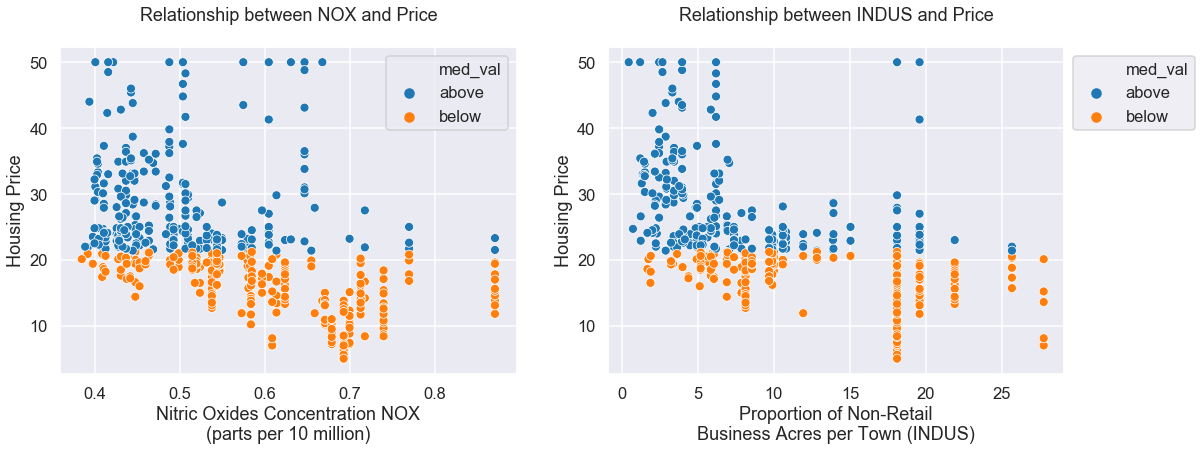

In [15]:
_=sns.set_style('darkgrid')
_=plt.rcParams['figure.figsize']=[18,6]
_=plt.subplot(1,2,1)
_=sns.scatterplot('NOX','PRICE', hue = 'med_val', data = bos)
_=plt.xlabel("Nitric Oxides Concentration NOX\n(parts per 10 million)")
_=plt.ylabel("Housing Price")
_=plt.title("Relationship between NOX and Price\n")

_=plt.subplot(1,2,2)
_=sns.scatterplot('INDUS','PRICE', hue = 'med_val', data = bos)
_=plt.xlabel("Proportion of Non-Retail\nBusiness Acres per Town (INDUS)")
_=plt.ylabel("Housing Price")
_=plt.title("Relationship between INDUS and Price\n")
_=plt.legend(bbox_to_anchor=(1, 1), loc=2)

****
### Scatterplots using Seabor and Regplot

[seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) provides automatic linear regression fits (useful for data exploration later on). The scatterplot below fits the linear regression x ~ y, or the median housing prices ~ Average number of rooms with a 95% confidence interval. Thus, the plot shows that as the number of rooms increases, so does the value of home.

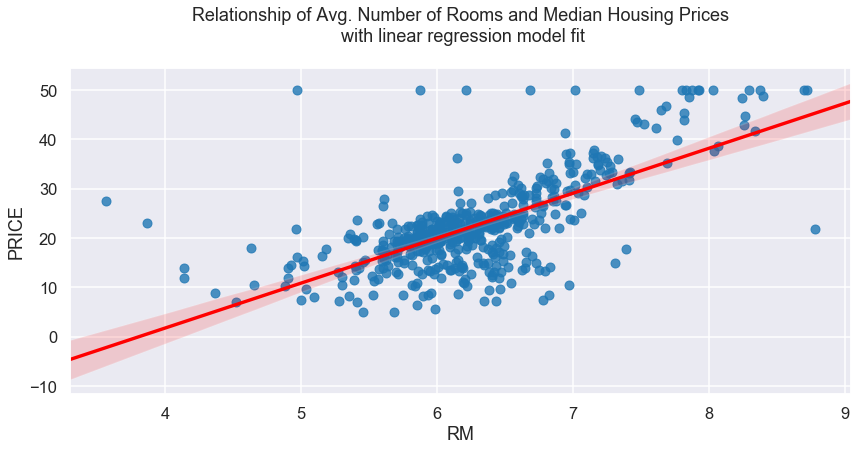

In [16]:
_=sns.set_style('darkgrid')
_=plt.rcParams['figure.figsize']=[14,6]
_=sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, line_kws={"color": "red"})
_=plt.title('Relationship of Avg. Number of Rooms and Median Housing Prices\n with linear regression model fit\n')

<p>TThe following scatterplot fits the linear regression of median housing prices ~ log10 transformed crime rate per capita, with a 95% confidence interval. Thus, the plot shows a negative relation between crime rate and housing prices. As crime rate increases, home values decrease.</p>

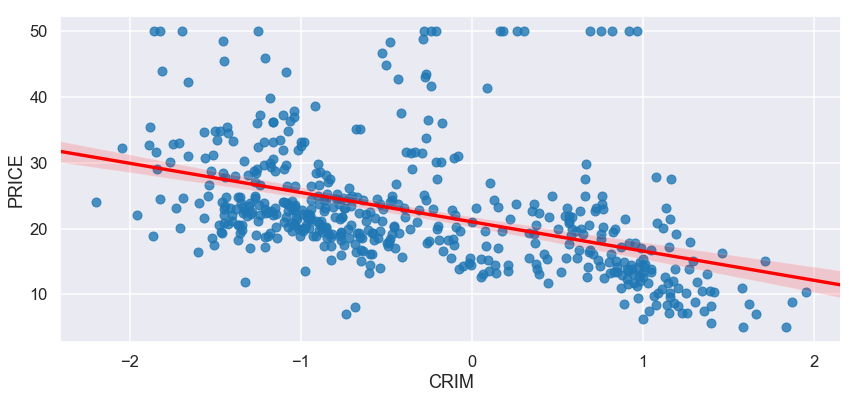

In [17]:
_=sns.set_style('darkgrid')
_=plt.rcParams['figure.figsize']=[14,6]
_=sns.regplot(y="PRICE", x=np.log10(bos.CRIM), data=bos, fit_reg = True, line_kws={"color": "red"})

****
### Histograms

#### Investigating Other Variables
<p>A histogram of crime rate per capita shows that the data is overly dispersed with isolated instances of large rates highly skewing the data. Hence, a logarithmic transformation is done to reduce the variability of the data and turn it into a nearly normal distribution to fit the linear regression model and better distinguish the distribution of all the data.</p>

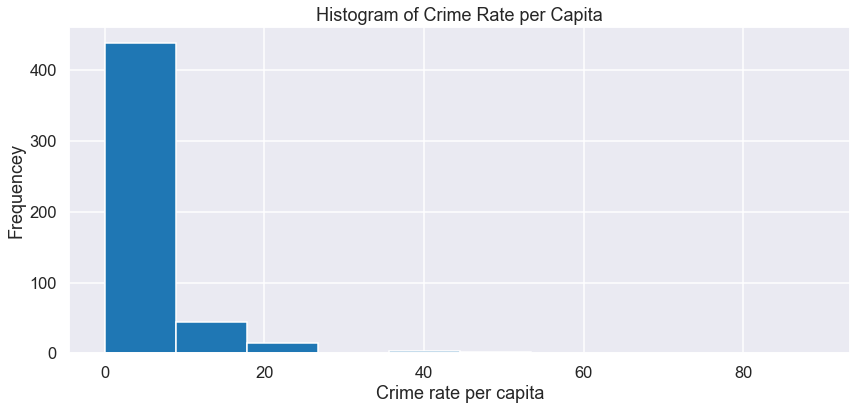

In [18]:
_=sns.set_style('darkgrid')
_=plt.rcParams['figure.figsize']=[14,6]
_=plt.hist(bos.CRIM)
_=plt.xlabel("Crime rate per capita")
_=plt.ylabel("Frequencey")
_=plt.title('Histogram of Crime Rate per Capita')

<p>The logarithmic transformation allows to see the distribution of the data more evenly distributed, making it easier to interpret. The plot shows that although the majority of the areas have crime rates lose to zero, crime varies in other areas.</p>

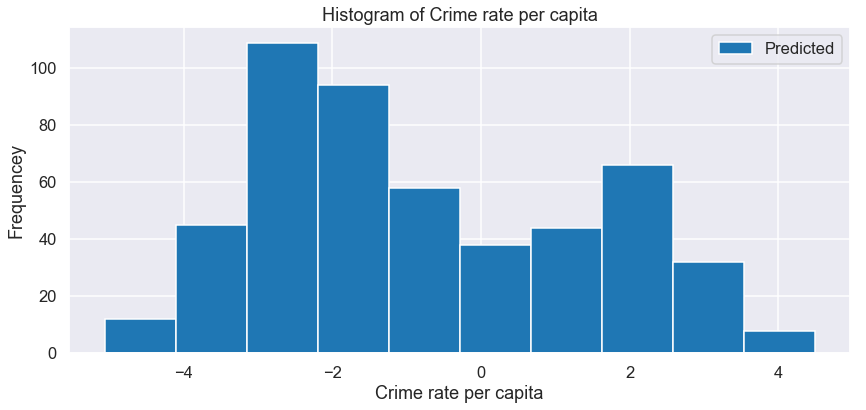

In [19]:
_=plt.hist(np.log(bos.CRIM))
_=plt.rcParams['figure.figsize']=[14,6]
_=plt.legend(['Predicted','Observed'])
_=plt.title("Histogram of Crime rate per capita")
_=plt.xlabel("Crime rate per capita")
_=plt.ylabel("Frequencey")

<p>Distribution of average number of rooms and pupil-teacher ratio by town.</p>

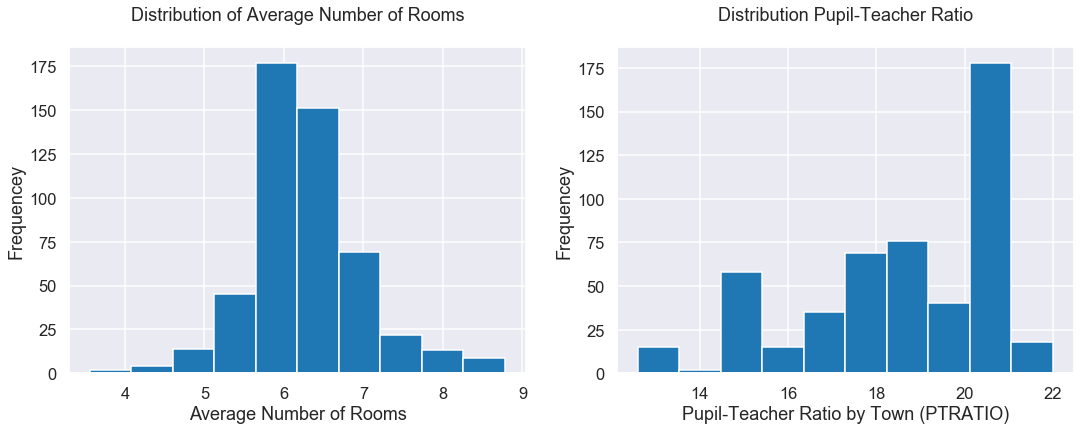

In [20]:
_=plt.rcParams['figure.figsize']=[18,6]
_=plt.subplot(1,2,1)
_=plt.hist(bos.RM)
_=plt.title('Distribution of Average Number of Rooms\n')
_=plt.xlabel("Average Number of Rooms")
_=plt.ylabel("Frequencey")

_=plt.subplot(1,2,2)
_=plt.hist(bos.PTRATIO)
_=plt.title('Distribution Pupil-Teacher Ratio\n')
_=plt.xlabel("Pupil-Teacher Ratio by Town (PTRATIO)")
_=plt.ylabel("Frequencey")

</p>Distribution of proportion of non-retail business acres per town and air pollution.</p>

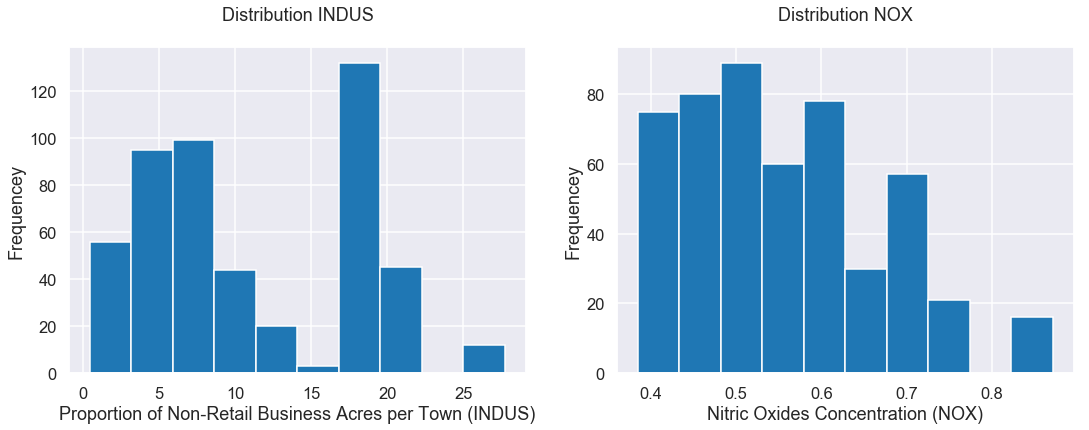

In [21]:
_=plt.rcParams['figure.figsize']=[18,6]
_=sns.set_style('darkgrid')
_=plt.subplot(1,2,1)
_=plt.hist(bos.INDUS)
_=plt.title('Distribution INDUS\n')
_=plt.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
_=plt.ylabel("Frequencey")

_=plt.subplot(1,2,2)
_=plt.hist(bos.NOX)
_=plt.title('Distribution NOX\n')
_=plt.xlabel("Nitric Oxides Concentration (NOX)")
_=plt.ylabel("Frequencey")

## Part 3 Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***

In [22]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

<p>Using the ordinary least-squares (OLS) regression, the first model to predict the median housing prices is fit using, <b><code>PRICE</code></b> as the target variable and the average number of rooms <b><code>RM</code></b> as the predictor variable.</p>

In [23]:
# Fitting a linear regression using one predictor
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           2.49e-74
Time:                        01:40:01   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

<p>The summary of the ols shows that, holding everything else constant, the average number of rooms is a statistical significant predictor of median home prices in boston. The regression model estimates that each additional room would increase home values by $\$9,100$.</p>
<p>The confidence interval shows that the median value will lie between $\$8,279$ and $\$9,925$.</p>

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

### Observed vs. Predicted
<p>A scatter plot of the observed vs. the predicted values shows that most values follow a constant pattern along a straight line, particularly between $\$10,000$ and $\$40,000$. The minimal distance between the actual and predicted values across the line around these prices shows the model’s estimations closely follow the observed values.</p>

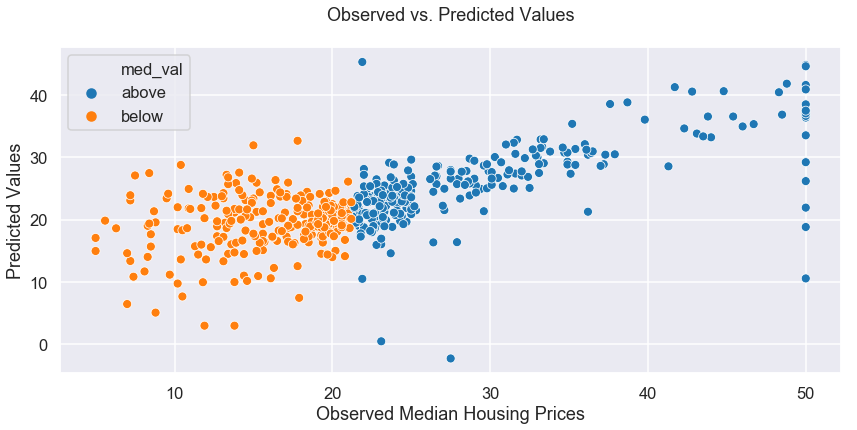

In [24]:
_=sns.set_style('darkgrid')
_=plt.rcParams['figure.figsize']=[14,6]
_=sns.scatterplot(x=bos.PRICE, y=m.fittedvalues, hue = bos.med_val)
_=plt.xlabel("Observed Median Housing Prices")
_=plt.ylabel('Predicted Values')
_=plt.title('Observed vs. Predicted Values\n')

## Fitting Linear Regression using `sklearn`


In [25]:
from sklearn.linear_model import LinearRegression
X = bos.drop(['PRICE', 'med_val'],axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

Output | Description
--- | --- 
`lm.get_params` | Get parameters of linear model
`lm.coef_`  | Estimated coefficients
`lm.intercept_`  | Estimated intercept 

## Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [26]:
# Use all 13 predictors to fit linear regression model
print('Initialize Linear Regression Model:\n')
lm.fit(X, bos.PRICE)

Initialize Linear Regression Model:



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


#### Intercept or No Intercept?

<p>Although a case could be made to remove the intercept and run the regression line through the origin to improve interpretability, the fact is that dropping the intercept, would create a less ‘accurate’ regression line that may not even fit the data and increase the residuals, effectively invalidating a linear relation between dependent and independent variables. Hence, creating a hypothetical line for convenience, would defeat the purpose of running the model.</p>


#### What Residuals Tell about the Model

<p>"One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? </p>
<p>If the residuals are normally distributed and there is consistent variance around the best fit, then the regression line found by the model would be fit most of the data. 
</p>

#### To use linear regression, $Y$ must be normally distributed. True or False?

<p><b>False.</b> The assumption of normality applies to the distribution of the residuals and not to the dependent or independent variables.</p>

### Estimated intercept and coefficients

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$

In [27]:
print('***')
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

***
Estimated intercept coefficient: 36.45948838509015


In [28]:
print('***')
print('Number of coefficients: {}'.format(len(lm.coef_)))

***
Number of coefficients: 13


In [29]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


## Predicting Median Housing Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $

In [30]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

* #### Histogram of Predicted Values

<p>A plot of the histogram of predicted home values with an overlay of the observed values shows the distributions are a close match. Although, the predicted values are nearly normally distributed, showing that the typical home value is around 20,000, the predicted values underestimate home prices which is seen by a slight shift to the left of the predicted distribution. While the observed data contains homes priced above 44,000, the predicted values has homes with negative values.</p> 
<p>A possible reason for the negative values could be the distribution of the observed housing prices is slightly skewed and a log transformation could better fit the linear regression model.</p>

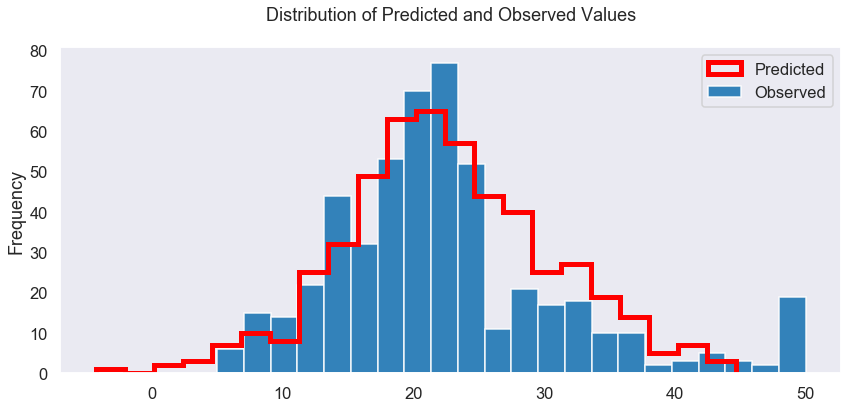

In [31]:
sns.set_style('dark')
_=plt.rcParams['figure.figsize']=[14,6]
_=plt.hist(bos.PRICE, alpha = 0.9, bins=int(np.sqrt(len(bos))))
_=plt.hist(lm.predict(X),histtype='step', linewidth=5, color = 'red',bins=int(np.sqrt(len(bos))))
_=plt.legend(['Predicted','Observed'])
_=plt.title('Distribution of Predicted and Observed Values\n')
_=plt.ylabel('Frequency')

#### Scatterplot of Predicted Values
<p>Just like we saw with the statsmodel, the predicted and the observed values follow a straight line with actual and predicted values very close to each other and the regression line.</p>



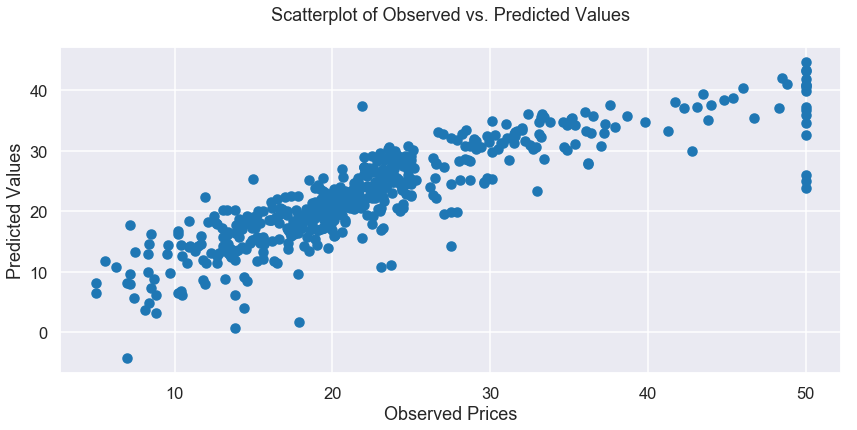

In [32]:
_=plt.rcParams['figure.figsize']=[14,6]
_=sns.set_style('darkgrid')
_=plt.scatter(x = bos.PRICE, y = lm.predict(X))
_=plt.title('Scatterplot of Observed vs. Predicted Values\n')
_=plt.xlabel('Observed Prices')
_=plt.ylabel('Predicted Values')

#### Statsmodel vs. Scikit-learn

<p>Both statsmodel and scikit-learn offer flexibility and tools to quickly fit and summarize regression models as long as the data is provided in the right format. One of the advantages of using statsmodels is the similarity to modeling with R and the comprehensive summary results of the model, including the confidence intervals and other summary statistics.</p>

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [33]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [34]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

1.11785704968299e-22


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$


Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.
****

* #### Looking at the relationship between `PTRATIO` and housing price.

<p>After fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town), the model estimates that pupil-teacher ratio by town is statistically significant at predicting median home values.</p>
<p>The regression coefficient (-2.1572) shows that a single increase in the pupil-teacher ratio is linked to a $\$ 2,150 $ decrease in home values. The intercept, 62.3446 is the average home price when the ratio is zero. In this case, the intercept has no real and direct meaning, since the  pupil-teacher ratio will never be zero since each town/county in the U.S. is part of a school district.</p>

<p>The $R^2$ value shows that although pupil-teacher ratio is statistically significant, by itself, is not a strong predictor of housing prices and using additional or different variables could give a stronger model.</p>

<p>Since the F-statistic should be evaluated in conjunction with the F-critical value and the p-value in order to evaluate if the results are statistically significant. Since the F-statistic is larger than the critical value and only one predictor was used, the model estimates that pupil-teacher ratio is statistically significant when considering both the p-value at 0.05 significance level and F-statistic values.</p>

<p>The $F$-statistic and the $t$-statistic for the regression coefficient show that the predictor is statistically significant, considering the model uses a single predictor.</p>

In [35]:
# Fitting a linear regression using one predictor
m_ptratio = ols('PRICE ~ PTRATIO',bos).fit()
print(m_ptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           1.61e-34
Time:                        01:40:01   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

****

### Fit a linear regression model using three independent variables

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

In [36]:
# Fitting a linear regression using one predictor
m_three = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m_three.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           6.15e-98
Time:                        01:40:01   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

### Interpreting the Model’s Results Using Three Preditors
<p>The $F$-statistic and the $t$-statistic for the regression coefficient show that the predictor is statistically significant, considering the model uses a single predictor.</p>

<p>Both the $F$-statistic, which is much higher than the critical value,  and p-value, which is 0.0 for all predictors, shows that with everything else held constant, these three predictors are statistically significant at predicting housing prices using a 0.05 significance level.</p>

<p>The $R^2$ statistic shows that with everything else held constant, the model is able to explain %59.4 of the variability of housing prices in Boston.</p>


<p>The summary of the model shows that together, crime rate per capita, average number of rooms, and the pupil-teacher ratio influence housing prices, average number of rooms having the higher impact. The model estimates that for every additional room, the price is expected to increase by $\$7,3804$. Crime rate has a negative impact on prices. According to the model a 1% increase in crime rate is associated with a $\$205$ decrease in housing prices. Pupil-teacher ratio also has a negative impact on prices. As the ratio increases, the estimated value of a home is expected to decrease by just over $\$1000$.</p>


## Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

#### Adding One More Variable
<p>One more variable was added to the model to evaluate if the predictive power of the model could be improved.</p>

In [37]:
# Fitting a linear regression using one predictor
m_four = ols('PRICE ~ CRIM + RM + PTRATIO + NOX',bos).fit()
print(m_four.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 12 Feb 2019   Prob (F-statistic):          1.45e-102
Time:                        01:40:01   Log-Likelihood:                -1598.3
No. Observations:                 506   AIC:                             3207.
Df Residuals:                     501   BIC:                             3228.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6405      4.365      1.521      0.1

**
#### <em>Location, location, location.</em>
<p>The air pollution attribute was added to the model to see if it could improve the predictive power of the model. The model results shows that by adding NOX to the model using crime rate, average number of rooms and the pupil-ratio variables, the model is now able to predict 61.3% of the variability in median housing prices. This is large improvement compared to the model using one or three variables, as it accounts for additional external factors that influence prices. Thus, helping explain that <em>‘location, location, location’ </em>can in fact increase or decrease the value of a home. </p>

****
## Evaluating the Model via Model Assumptions and Other Issues

<p>Linear regression makes several assumptions.</p>


<p><b><em>** Linearity: </em> </b> The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by transforming one or more independent variables, the dependent variable, or both. In other cases, a generalized linear model or a nonlinear model.</p>

<p><b><em>**Constant standard deviation: </em></b> The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases.</p>

<p><b><em>**Normal distribution for errors: </em></b>The $\epsilon$ term are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.</p>

$$ \epsilon_i \sim N(0, \sigma^2)$$

<p>Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively.</p>

<p><b><em>**Independent errors: </em></b>The observations are assumed to be obtained independently. e.g. Observations across time may be correlated</p>

<p><b><em>**Correlated Predictors:</em></b>Highly correlated variables.</p>

<p><b><em>**Influential Points: </em></b>Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.</p>

#### Fitted values versus residuals plot.
What does the plot tell you? Are there any violations of the model assumptions?

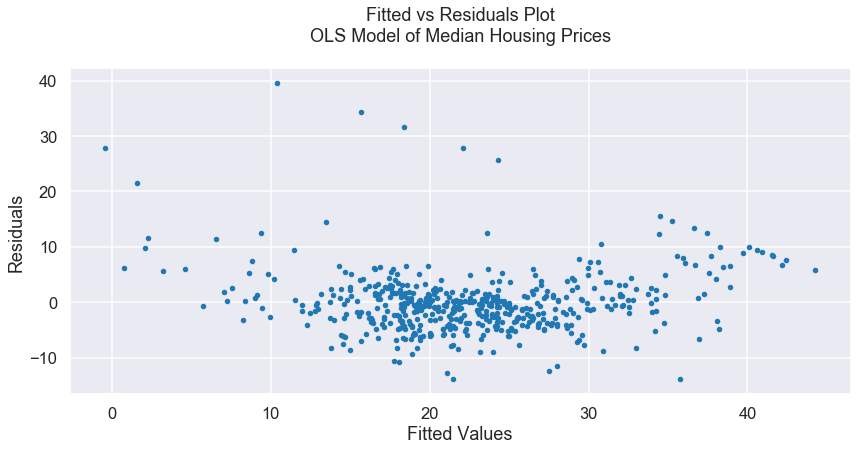

In [38]:
_=plt.rcParams['figure.figsize']=[14,6]
_=sns.set_style('darkgrid')
_=plt.plot(m_four.fittedvalues, m_four.resid, marker = '.', linestyle = 'none')
_=plt.xlabel('Fitted Values')
_=plt.ylabel('Residuals')
_=plt.title('Fitted vs Residuals Plot\nOLS Model of Median Housing Prices\n')

<p>The fitted vs residuals plot shows that the variance across data points is mostly constant, across the 0 horizontal line. Since there are a few residuals that deviate from the pattern followed by the majority of the points, this indicates the presence of outliers in the data.</p>

### Quantile Plot of Residuals

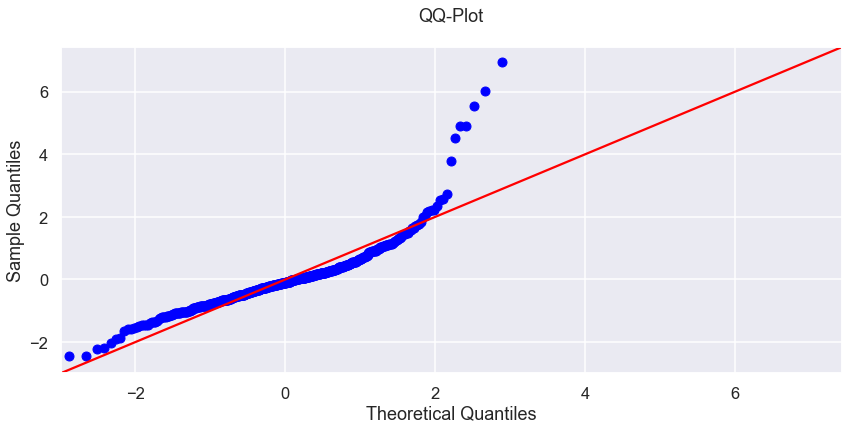

In [39]:
_=plt.rcParams['figure.figsize']=[14,6]
_=sm.qqplot(m_four.resid, fit=True,line='45')
_=plt.title('QQ-Plot\n')

<p>The qqplot shows that although the majority of the data points in the middle of the plot nearly follow a straight line, several values curve and highly deviate from the line higher upper part of the plot. This shows that there are more extreme high values than expected if the distribution was in fact nearly normally distributed. </p>
<p>The advantages of using this plot is that it shows if the underlying data come from a nearly normal distribution.</p>

In [40]:
# find the outliers based on the qqplot
bos[m_four.resid>=20]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,med_val
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,above
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,above
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,above
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,above
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,above
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,above
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,above


<p>The outliers shown in the upper right corner of the plot come from homes located in the same area, based on their index of accessibility to radial highways (RAD). The index indicates homes located in accessible (low indices) or remote areas ( high indices). One explanation for this outliers, could be that there are confounding variables related to homes located in RAD 24 that can impact their home values and these attributes are not considered for homes located in more accessible areas.</p>

In [41]:
# summary statistics of the predictors
bos[['CRIM', 'RM','PTRATIO','NOX']].describe()

,CRIM,RM,PTRATIO,NOX
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,18.455534,0.554695
std,8.601545,0.702617,2.164946,0.115878
min,0.006320,3.561000,12.600000,0.385000
25%,0.082045,5.885500,17.400000,0.449000
50%,0.256510,6.208500,19.050000,0.538000
75%,3.677083,6.623500,20.200000,0.624000
max,88.976200,8.780000,22.000000,0.871000


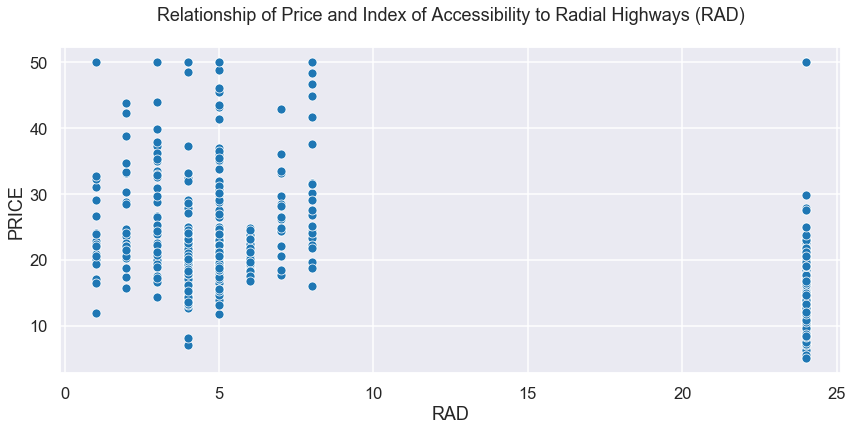

In [42]:
# looking at homes in different areas.
_=plt.rcParams['figure.figsize']=[14,6]
_=sns.scatterplot(x=bos.RAD, y = bos.PRICE)
_=plt.title("Relationship of Price and Index of Accessibility to Radial Highways (RAD)\n")

### Leverage Plot

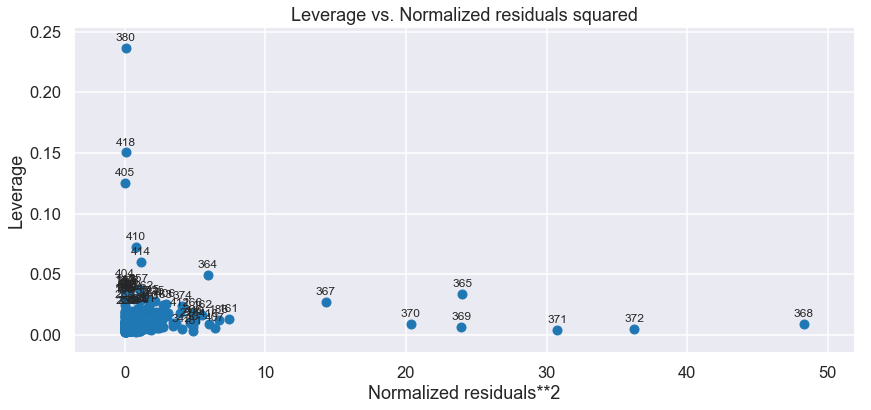

In [43]:
# create a leverage plot
_=plt.rcParams['figure.figsize']=[14,6]
_=sm.graphics.plot_leverage_resid2(m_four)

In [44]:
bos.iloc[[380,418,405]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,med_val
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4,below
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,below
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,below


In [45]:
# show top 5 crime rate per capita values
bos[['CRIM','PTRATIO']].sort_values('CRIM').tail()

,CRIM,PTRATIO
414,45.7461,20.2
410,51.1358,20.2
405,67.9208,20.2
418,73.5341,20.2
380,88.9762,20.2


<p>The leverage plot shows that the data points with the highest leverage are located in a remote area (RAD 24), and have the highest crime rate per capita. In fact, the five highest leverage points have the top five crime rate per capita.</p>

#### Remove the Outliers and High Leverage Points

In [46]:
# drop indices of outliers and high leverage values
bos_no = bos.drop([380,418,405,410,365,367,368,369,370,371,372], axis = 0)

In [47]:
# Fitting a linear regression using one predictor
lr_no = ols('PRICE~ CRIM + RM + PTRATIO + NOX', bos_no).fit()
print(lr_no.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     359.8
Date:                Tue, 12 Feb 2019   Prob (F-statistic):          2.83e-144
Time:                        01:40:02   Log-Likelihood:                -1438.9
No. Observations:                 495   AIC:                             2888.
Df Residuals:                     490   BIC:                             2909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8518      3.479      1.395      0.1

**
<p>By removing the outliers and high leverage points, the OLS model improved significantly. The model, which used crime rate per capita, average number of rooms, air pollution and pupil-teacher ratio as the predictor variables, explains 74.3% of the variability in median housing prices. With a p-value of 0.0 at the 0.05 significance level, the results are statistically significant.</p>

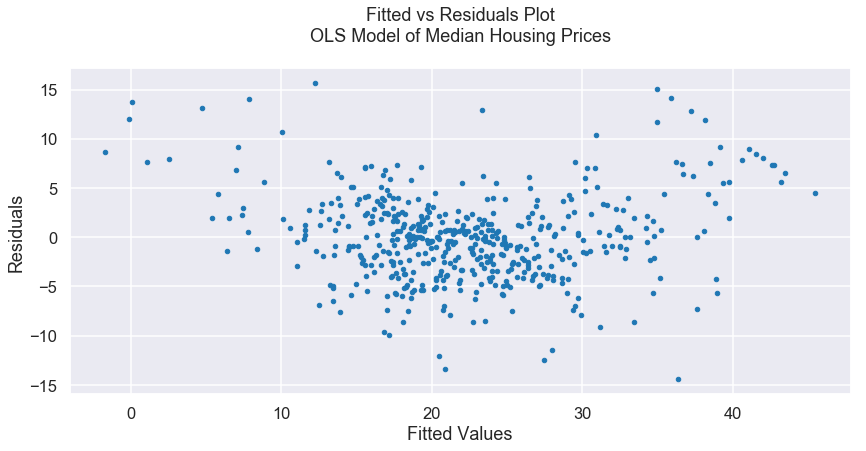

In [48]:
_=sns.set_context('talk')
_=plt.rcParams['figure.figsize']=[14,6]
_=sns.set_style('darkgrid')
_=plt.plot(lr_no.fittedvalues, lr_no.resid, marker = '.', linestyle = 'none')
_=plt.xlabel('Fitted Values')
_=plt.ylabel('Residuals')
_=plt.title('Fitted vs Residuals Plot\nOLS Model of Median Housing Prices\n')

<p>The variability of the residuals also improved, with less obvious outliers and roughly uniform varias along the 0 line. </p>

### Conclusions

<p>The previous analysis used housing data to create several predictive models using scikit-learn, statsmodel, and a combination of predictors. Although most models were fit using statsmodel, both packages offer flexible tools to develop predictive models and evaluate results, with statsmodel providing an all-at-once summary statistics for the models.</p>
<p>Regarding the predictions, the different OLS models showed that multilinear regression can provide higher predictive power than a simple linear regression model, as a combination of predictors might help better explain the complexities associated with a dependent variable.</p>

<p>However, the predictive power is dependent not only on how much sense it makes to use the predictor, but whether it has extreme values that can affect the regression model. In this case, removing extreme values discovered with the qqplot, allowed to fit a model that was able to explain over 70% of the variability of home prices, compared to a previous model that used outliers and explained roughly 60% of the variability. </p>
